In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
from scipy.signal import find_peaks, peak_prominences
%matplotlib inline

In [1]:
df_A = pd.read_excel("Red Mud A.xlsx")
df_A = df_A.rename(columns={'Exp-1': 'Intensity'})
#df_A.head()
#df_A.describe()

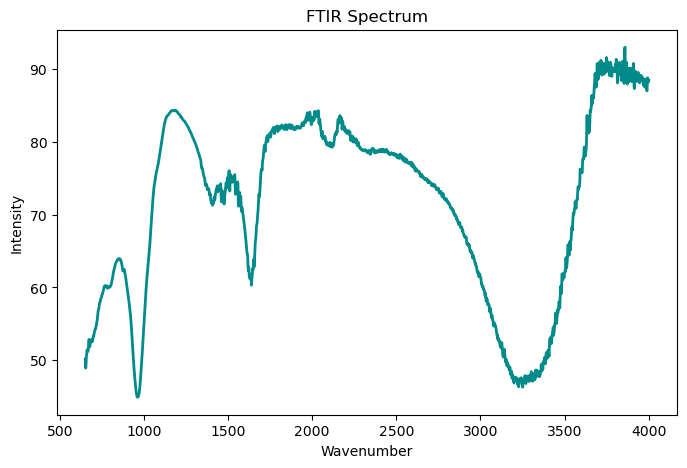

In [2]:
# Plot wavenumber against intensity with customizations
plt.plot(df_A.iloc[:, 0], df_A.iloc[:, 1], label='FTIR Data', color='darkcyan', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('FTIR Spectrum')

# Increase the width of the plot
plt.gcf().set_size_inches(8, 5)

# Show the plot
plt.show()



Lower Peak Coordinates:
Wavenumber: 961.937, Intensity: 44.8939
Wavenumber: 1407.48, Intensity: 71.3089
Wavenumber: 1638.65, Intensity: 60.3093
Wavenumber: 2119.62, Intensity: 79.2949
Wavenumber: 3251.2, Intensity: 46.2699


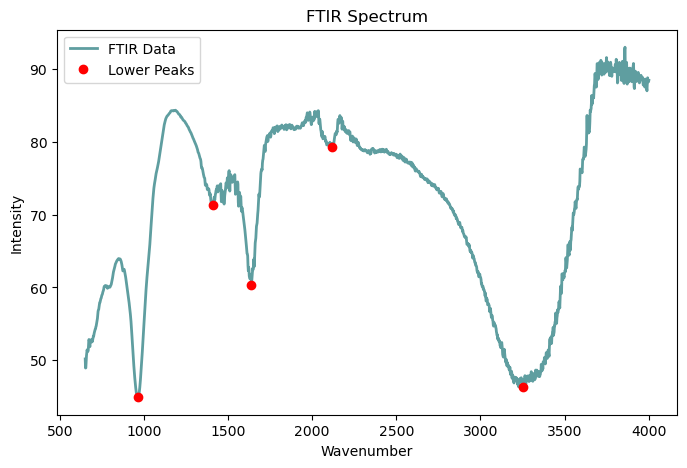

In [3]:
from peakdetect import peakdetect

# Extract the intensity column from your FTIR data
data = df_A.iloc[:, 1].values

# Detect peaks using peakdetect
peaks = peakdetect(data, lookahead=70)
lower_peaks = np.array(peaks[1])

# Print the coordinates of lower peaks
print("Lower Peak Coordinates:")
for coordinate in lower_peaks:
    wavenumber, intensity = df_A.iloc[int(coordinate[0]), 0], coordinate[1]
    print(f"Wavenumber: {wavenumber}, Intensity: {intensity}")

# Plot the original FTIR data
plt.plot(df_A.iloc[:, 0], data, label='FTIR Data', color='cadetblue', linestyle='-', linewidth=2)
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('FTIR Spectrum')

# Plot lower peaks in black
plt.plot(df_A.iloc[lower_peaks[:, 0], 0], lower_peaks[:, 1], 'ro', label='Lower Peaks')

# Increase the width of the plot
plt.gcf().set_size_inches(8, 5)

# Add legend
plt.legend()

# Show the plot
plt.show()
